# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Data Distribution

In [2]:
df = pd.read_csv("../data/clean_compiled_transcripts.csv").sort_values(by=['Participant_ID'], ascending=True)
df.head(10)

,Participant_ID,Transcript,PHQ_Score,PHQ_Binary
0,300,good atlanta um my parents um i love it i like...,2,0
1,301,thank you mmm k i good thank you i los angeles...,3,0
2,302,i fine yourself i los angeles part okay um my ...,4,0
3,303,okay bout yourself yeah oh well it big broad l...,0,0
4,304,i good um los angeles um cool weather beaches ...,6,0
5,305,i alright uh originally i uh born glendale i h...,7,0
6,306,fine uh mhm uh career career possibilities uh ...,0,0
7,307,um moscow um my family moved us i moved eventu...,4,0
8,308,los angeles yes um southern lifestyle beaches ...,22,1
9,309,yeah i good uh uh acting stuff like entertain ...,15,1


## Histogram Plot of PHQ Score Distribution
The higher the PHQ score, the more severe the depression.

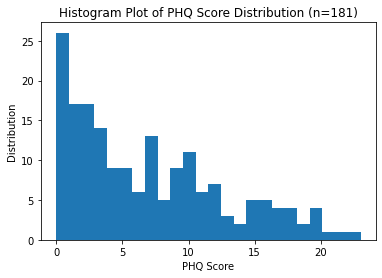

In [3]:
plt.hist(df.PHQ_Score, bins=24) # max score is 24
plt.title('Histogram Plot of PHQ Score Distribution (n={})'.format(len(df)))
plt.ylabel('Distribution')
plt.xlabel('PHQ Score')
plt.show()

## Bar Plot of Depression Cases
A PHQ score of 10 and above is considered as depression.

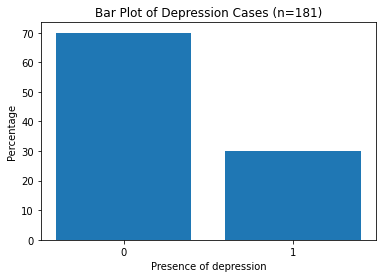

In [4]:
x_labels = [0, 1]

# Convert to correct percentages in the y axis
percent_negative = round(len(df[df.PHQ_Binary == 0]) / len(df) * 100)
percent_positive = 100 - percent_negative

y_val = [percent_negative, percent_positive]
plt.bar(x_labels, y_val, align='center')
plt.title('Bar Plot of Depression Cases (n={})'.format(len(df)))
plt.ylabel('Percentage')
plt.xlabel('Presence of depression')
plt.xticks(x_labels)
plt.show()

# Analysis of Possible Trends

## Word Count

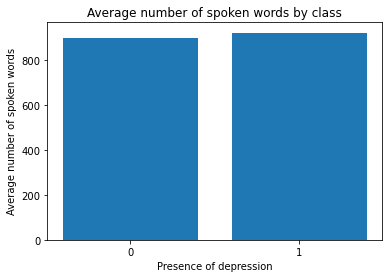

In [5]:
df_nondepressed = df[df.PHQ_Binary == 0].Transcript
df_depressed = df[df.PHQ_Binary == 1].Transcript

def count_words(df_transcript):
    count = 0
    for transcript in df_transcript:
        words = transcript.split()
        count += len(words)
    return count/len(df_transcript)

y_val = [count_words(df_nondepressed), count_words(df_depressed)]

plt.bar(x_labels, y_val)
plt.title('Average number of spoken words by class')
plt.ylabel('Average number of spoken words')
plt.xlabel('Presence of depression')
plt.xticks(x_labels)
plt.show()

There is only a 2% difference in the average number of spoken words spoken between both classes. The word count feature is unlikely to be useful in model creation.